<a href="https://colab.research.google.com/github/MoniaGierszewska/Kurs-Data-Science/blob/main/Kopia_notatnika_arpdatapl9_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [ ]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.dtypes

Size        int64
Bedrooms    int64
Price       int64
dtype: object

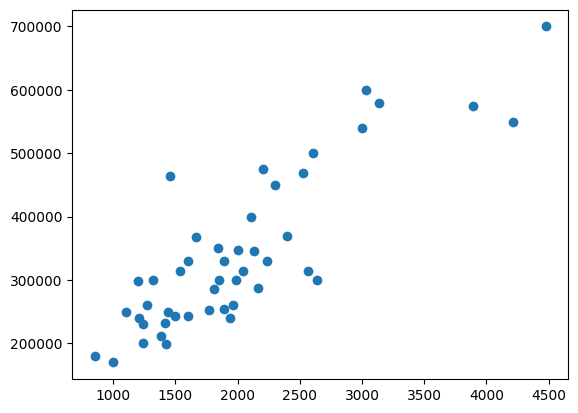

In [ ]:
plt.plot(df.Size,df.Price,'o')
plt.show()

In [ ]:
#y=1000+400*x

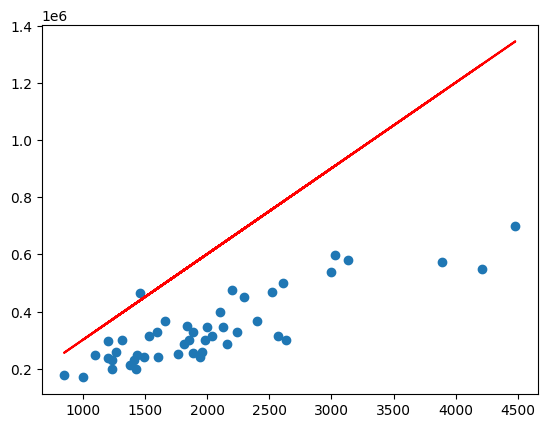

In [ ]:
plt.plot(df.Size,df.Price,'o')
plt.plot(df.Size,1000+df['Size']*300,'r')

In [ ]:
#gradient

#przyporządkowanie zmiennej zależnej i niezależnej
X=df['Size'].values
y=df['Price'].values

X=np.column_stack(([1]*len(X),X)) # dodanie kolumny z jedynkami - technikalia


In [ ]:
from pandas.core.computation.pytables import Constant
def gradientDescent(X,y,theta,alpha,m,numIterations):
  '''
  param: X - zmienne niezalezne
  param: y - zmienna zalezna
  param: theta - macierz [Theta_0 czyli punkt przeciecia/wyraz wolny, Theta_1 czyli wspolczynnik od X1]
  param: alpha - wspolczynnik uczenia - jak duze kroki zrobic
  param: m - liczba obserwacji
  param: numIterations - liczba iteracji naszego modelu, czyli ile krokow zrobic
  '''
  xTrans=X.transpose()                        # potrzebne do obliczenia gradientow (technikalia)
  cost_array=np.empty([numIterations,2])      # macierz, do ktorej bede zapisywac wartosc funkcji kosztu po kazdej iteracji
  for i in range(0,numIterations):            #petla
    hypothesis=np.dot(X,theta)                #bierzemy kazdy x, mnozymy przez theta_1 i dodajemy theta_0 - przewiduje cene domu
    loss=hypothesis-y                         #odleglosc kropek od linii, innymi slowy reszty/roznice
    cost=np.sum(loss**2)/(2*m)                #wartosc funkcji kosztu
    print('Iteration %d | Cost %f' %(i,cost))
    cost_array[i][0]=i                  
    cost_array[i][1]=cost
    gradient=np.dot(xTrans,loss)/m            #pochodna cząstkowa funkcji
    theta=theta-alpha*gradient
  return theta,cost_array


In [ ]:
m=len(X)
numIterations=100
alpha=0.00000005
theta=[10000,200] #theta0, theta1
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 5813726085.180851
Iteration 1 | Cost 4381421212.050714
Iteration 2 | Cost 3534504409.234169
Iteration 3 | Cost 3033725500.251567
Iteration 4 | Cost 2737616702.642472
Iteration 5 | Cost 2562528617.402239
Iteration 6 | Cost 2458999650.999535
Iteration 7 | Cost 2397783338.262231
Iteration 8 | Cost 2361586347.859973
Iteration 9 | Cost 2340183194.191640
Iteration 10 | Cost 2327527583.817212
Iteration 11 | Cost 2320044364.828128
Iteration 12 | Cost 2315619562.556095
Iteration 13 | Cost 2313003191.262743
Iteration 14 | Cost 2311456138.805644
Iteration 15 | Cost 2310541370.791275
Iteration 16 | Cost 2310000470.329744
Iteration 17 | Cost 2309680636.428803
Iteration 18 | Cost 2309491518.402610
Iteration 19 | Cost 2309379692.210452
Iteration 20 | Cost 2309313568.406162
Iteration 21 | Cost 2309274468.262042
Iteration 22 | Cost 2309251347.112525
Iteration 23 | Cost 2309237674.285952
Iteration 24 | Cost 2309229588.219293
Iteration 25 | Cost 2309224805.583994
Iteration 26 | Cost 23

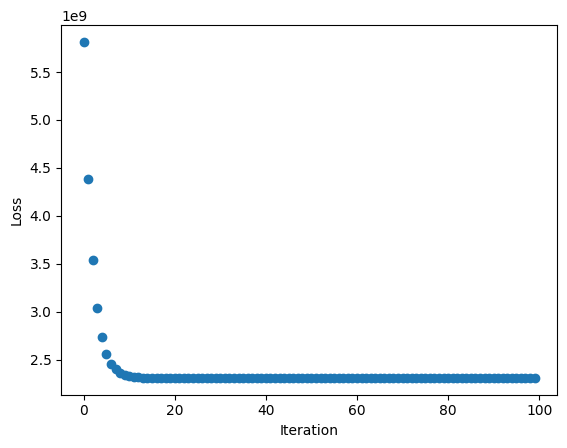

In [ ]:
epoch=range(len(cost_array[:,0]))
plt.plot(epoch,cost_array[:,1],'o')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
theta

array([10000.02411714,   161.05351593])

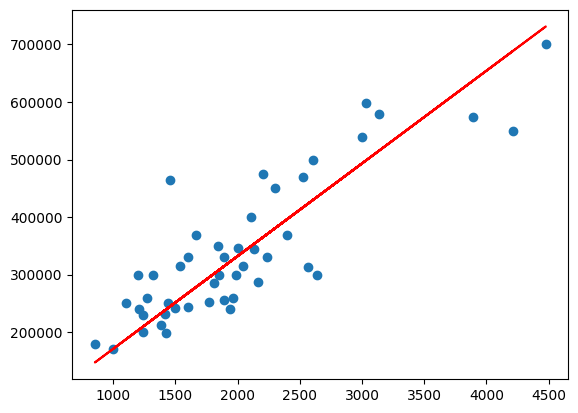

In [ ]:
plt.plot(df['Size'],df['Price'],'o')
plt.plot(df['Size'],theta[0]+df["Size"]*theta[1],'r')
plt.show()

In [ ]:
#sklearn

Regresja jednej zmiennej

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
#theta 0, wyraz wolny
model.intercept_

71270.49244872917

In [ ]:
model.coef_

array([134.52528772])

In [ ]:
predict_data=np.array([[3200],[3720]])
predict_data

array([[3200],
       [3720]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([501751.4131535 , 571704.56276803])

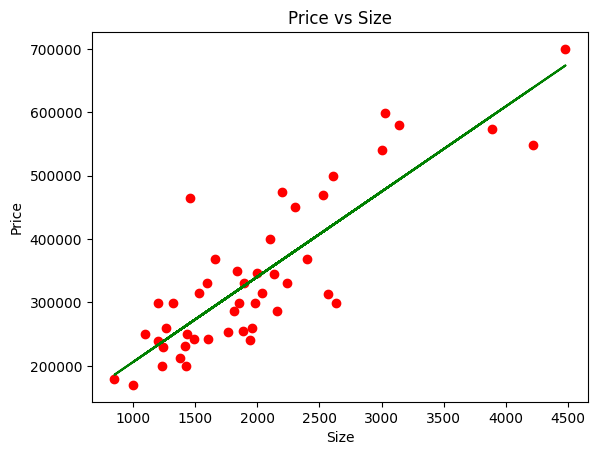

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='green')
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(x_range.reshape(-1,1))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Regression Fit'))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



Regresja wielu zmiennych

In [ ]:
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']


In [ ]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [ ]:
model.intercept_

89597.90954279754

In [ ]:
model.coef_

array([  139.21067402, -8738.01911233])

In [ ]:
predict_data=np.array([[3200,3],[3720,2],[5000,10]])
predict_data

array([[3200,    3],
       [3720,    2],
       [5000,   10]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([508858.00906222, 589985.57866371, 698271.08850765])

Zadania regresja liniowa jednej oraz wielu zmiennych

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import files
import io

In [ ]:
#wczytamy dane

url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#atemp - temperatura odczuwalna danego dnia, wedlug dokumentacji zmienna zostala znormalizowana i wystandaryzowana - przyjmuje wartosci od 0 do 1
#cnt - ilosc wypozyczonych rowerow danego dnia

In [ ]:
#cnt zalezy od atemp

In [ ]:
#przypisz atemp jako zmienną niezależną i cnt jako zmienną zależną
X=df['atemp'].values
y=df['cnt'].values

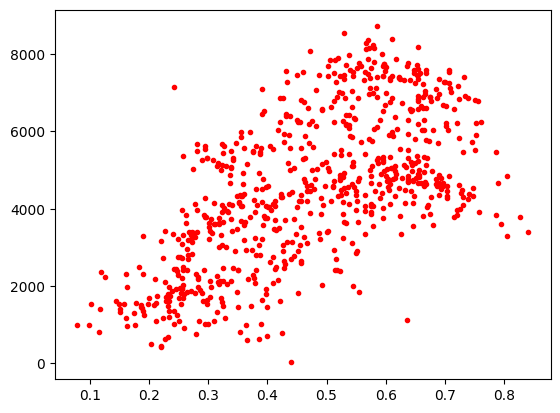

In [ ]:
#stwórz wykres zależności atemp i cnt
plt.plot(df['atemp'],df['cnt'],'r.')
plt.show()

In [ ]:
#przy wykorzystaniu funkcji gradientDescent wyćwicz model (osiągnij minimum lokalne funkcji kosztu)
X=np.column_stack(([1]*len(X),X))
X

array([[1.      , 0.363625],
       [1.      , 0.353739],
       [1.      , 0.189405],
       ...,
       [1.      , 0.2424  ],
       [1.      , 0.2317  ],
       [1.      , 0.223487]])

In [ ]:
m=len(X)
numIterations=3000
alpha=0.1
theta=[0,0]
theta,cost_array=gradientDescent(X,y,theta,alpha,m,numIterations)

Iteration 0 | Cost 12018406.441176
Iteration 1 | Cost 9602195.925103
Iteration 2 | Cost 7743383.111946
Iteration 3 | Cost 6313285.769408
Iteration 4 | Cost 5212929.980661
Iteration 5 | Cost 4366191.511097
Iteration 6 | Cost 3714520.598765
Iteration 7 | Cost 3212884.610151
Iteration 8 | Cost 2826647.397878
Iteration 9 | Cost 2529169.107907
Iteration 10 | Cost 2299960.109109
Iteration 11 | Cost 2123261.117322
Iteration 12 | Cost 1986951.120161
Iteration 13 | Cost 1881707.424619
Iteration 14 | Cost 1800359.620924
Iteration 15 | Cost 1737392.694038
Iteration 16 | Cost 1688564.849698
Iteration 17 | Cost 1650613.571348
Iteration 18 | Cost 1621029.538464
Iteration 19 | Cost 1597882.739398
Iteration 20 | Cost 1579688.728820
Iteration 21 | Cost 1565305.761734
Iteration 22 | Cost 1553855.675734
Iteration 23 | Cost 1544663.038831
Iteration 24 | Cost 1537208.345975
Iteration 25 | Cost 1531092.020889
Iteration 26 | Cost 1526006.728651
Iteration 27 | Cost 1521716.080354
Iteration 28 | Cost 1518038.2

In [ ]:
theta

array([ 950.08406197, 7493.04678383])

In [ ]:
#narysuj prostą regresji na wykresie z naszymi obserwacjami

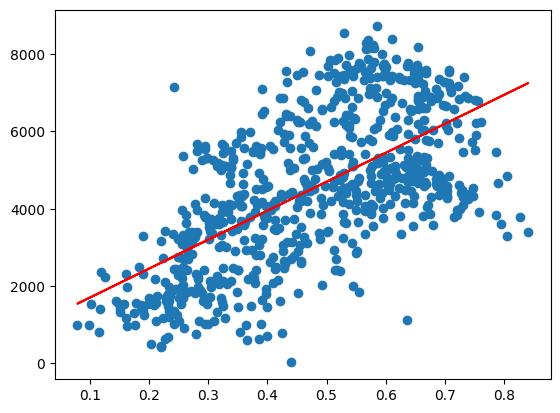

In [ ]:
plt.plot(df['atemp'],df['cnt'],'o')
plt.plot(df['atemp'],theta[0]+df['atemp']*theta[1],'r')
plt.show()

In [ ]:
#na podstawie wytrenowanych wspolczynnikow theta stworz funkcję
#zdolna do predykcji ilosci wypozyczonych rowerow w zaleznosci od temperatury 
def predict_price(x,theta_0,theta_1):
  result=theta_0+theta_1*x
  return result


In [ ]:
#stworz predykcję ilości wypożyczonych rowerów na dzień, w którym unormalizowana temperatura wynosila 0.8
predict_price(x=0.8,theta_0=theta[0],theta_1=theta[1])

6944.521489037999

sklearn - regresja wielu zmiennych

In [ ]:
#jako zmienną zależną ponownie wybierzemy cnt
y=df['cnt']
#jako zmienne niezależne atemp (temperatura), hum (wilgotnosc), windspeed (predkosc wiatru), workingday (czy dany dzien jest pracujacy)
X=df[['atemp','hum','windspeed','workingday']]

In [ ]:
#wytrenuj model (metoda fit)
reg=LinearRegression().fit(X,y)

In [ ]:
#sprawdz wielkosc interceptu i wspolczynnikow regresji
print(reg.intercept_)
print(reg.coef_)

3698.4373927964907
[ 7486.28341042 -3174.17132979 -4407.19069508   127.65517425]


In [ ]:
#napisz wzór końcowy modelu

$y = 3698 + 7486*atemp - 3174*hum - 4407*windspeed + 127*workingday $

In [ ]:
#zinterpretuj współczynniki modelu
#3698 - w dniu z temperaturą znormalizowaną 0, wilgotnością znormalizowaną 0, wiatrem znormalizowanym 0 i w dniu niepracującym tyle będzie
#wypożyczeń rowerów 
#7486*atemp - wraz ze wzrostem atemp o jednostkę liczba wypożyczeń rowerów rośnie o 7486
#-3174*hum - wraz ze wzrostem hum o jednostkę liczba wypożyczeń rowerów spada o 3174
#-4407*windspeed - wraz ze wzrostem windspeed o jednostkę liczba wypożyczeń rowerów spada o 4407
#127*workingday (zmienna binarna) - w dniu pracującym liczba wypożyczeń rowerów w stosunku do dnia wolnego wzrasta o 127

In [ ]:
#stwórz predykcję ilości wypożyczonych rowerów w dzień, gdzie atemp=0.5,hum=0.3, windspeed=0.25, dzień jest pracujący
reg.predict([[0.5,0.3,0.25,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5515.18519955])

Regresja wielomianowa

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [ ]:
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X.values[:5]

array([[2104],
       [1600],
       [2400],
       [1416],
       [3000]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
poly=PolynomialFeatures(degree=3)
X_poly=poly.fit_transform(X)
X_poly[:5]

array([[1.00000000e+00, 2.10400000e+03, 4.42681600e+06, 9.31402086e+09],
       [1.00000000e+00, 1.60000000e+03, 2.56000000e+06, 4.09600000e+09],
       [1.00000000e+00, 2.40000000e+03, 5.76000000e+06, 1.38240000e+10],
       [1.00000000e+00, 1.41600000e+03, 2.00505600e+06, 2.83915930e+09],
       [1.00000000e+00, 3.00000000e+03, 9.00000000e+06, 2.70000000e+10]])

In [ ]:
model=LinearRegression()
model.fit(X_poly,y)

LinearRegression()

In [ ]:
model.intercept_

236407.0358523208

In [ ]:
model.coef_

array([ 0.00000000e+00, -1.07855433e+02,  1.06190390e-01, -1.38299983e-05])

In [ ]:
predict_data=np.array([[3200],[3720]])
predict_data

array([[3200],
       [3720]])

In [ ]:
predict_data_poly=poly.transform(predict_data)
predict_data_poly

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([[1.0000000e+00, 3.2000000e+03, 1.0240000e+07, 3.2768000e+10],
       [1.0000000e+00, 3.7200000e+03, 1.3838400e+07, 5.1478848e+10]])

In [ ]:
model.predict(predict_data_poly)

array([525477.86332531, 592737.54295217])

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['Size'].min(),X['Size'].max(),50)
y_range=model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['Size'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()

In [ ]:
#wracamy do zbioru danych z wypożyczeniami rowerów
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()

#jako zmienną zależną wybieramy cnt, jako niezależną atemp
y=df['cnt']
X=df[['atemp']]
#formatujemy zmienną atemp na dwa stopnie potęgi
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X)
X_poly[:5]
#trenujemy model na podstawie rozszerzonego zbioru (atemp i jej potęgi)
poly_reg_model=LinearRegression()
poly_reg_model.fit(X_poly,y)
print(poly_reg_model.intercept_)
print(poly_reg_model.coef_)
#stworzymy predykcję ilości wypożyczonych rowerów na dzień, w którym znormalizowana temperatura równała się 0.8
predict_data=np.array([[0.8]])
predict_data_poly=poly.transform(predict_data)
predict_data_poly

poly_reg_model.predict(predict_data_poly)

-2155.0968932330406
[     0.          22767.32495365 -16460.45125404]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



array([5524.0742671])

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

x_range=np.linspace(X['atemp'].min(),X['atemp'].max(),50)
y_range=poly_reg_model.predict(poly.fit_transform(x_range.reshape(-1,1)))

fig=px.scatter(x=X['atemp'],y=y,opacity=0.65)
fig.add_traces(go.Scatter(x=x_range,y=y_range,name='Polynomial Regression Fit'))
fig.show()

Drzewo decyzyjne


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [ ]:
df.columns=['Size','Bedrooms','Price']
df.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']


In [ ]:
X.values[:5]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [ ]:
y.values[:5]

array([399900, 329900, 369000, 232000, 539900])

In [ ]:
model=DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [ ]:
predict_data=np.array([[3200,3],[3720,2]])
predict_data

array([[3200,    3],
       [3720,    2]])

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([579900., 573900.])

In [ ]:
model=DecisionTreeRegressor(max_depth=5,min_samples_leaf=3)
model.fit(X,y)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
model.predict(predict_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([572933.33333333, 607600.        ])

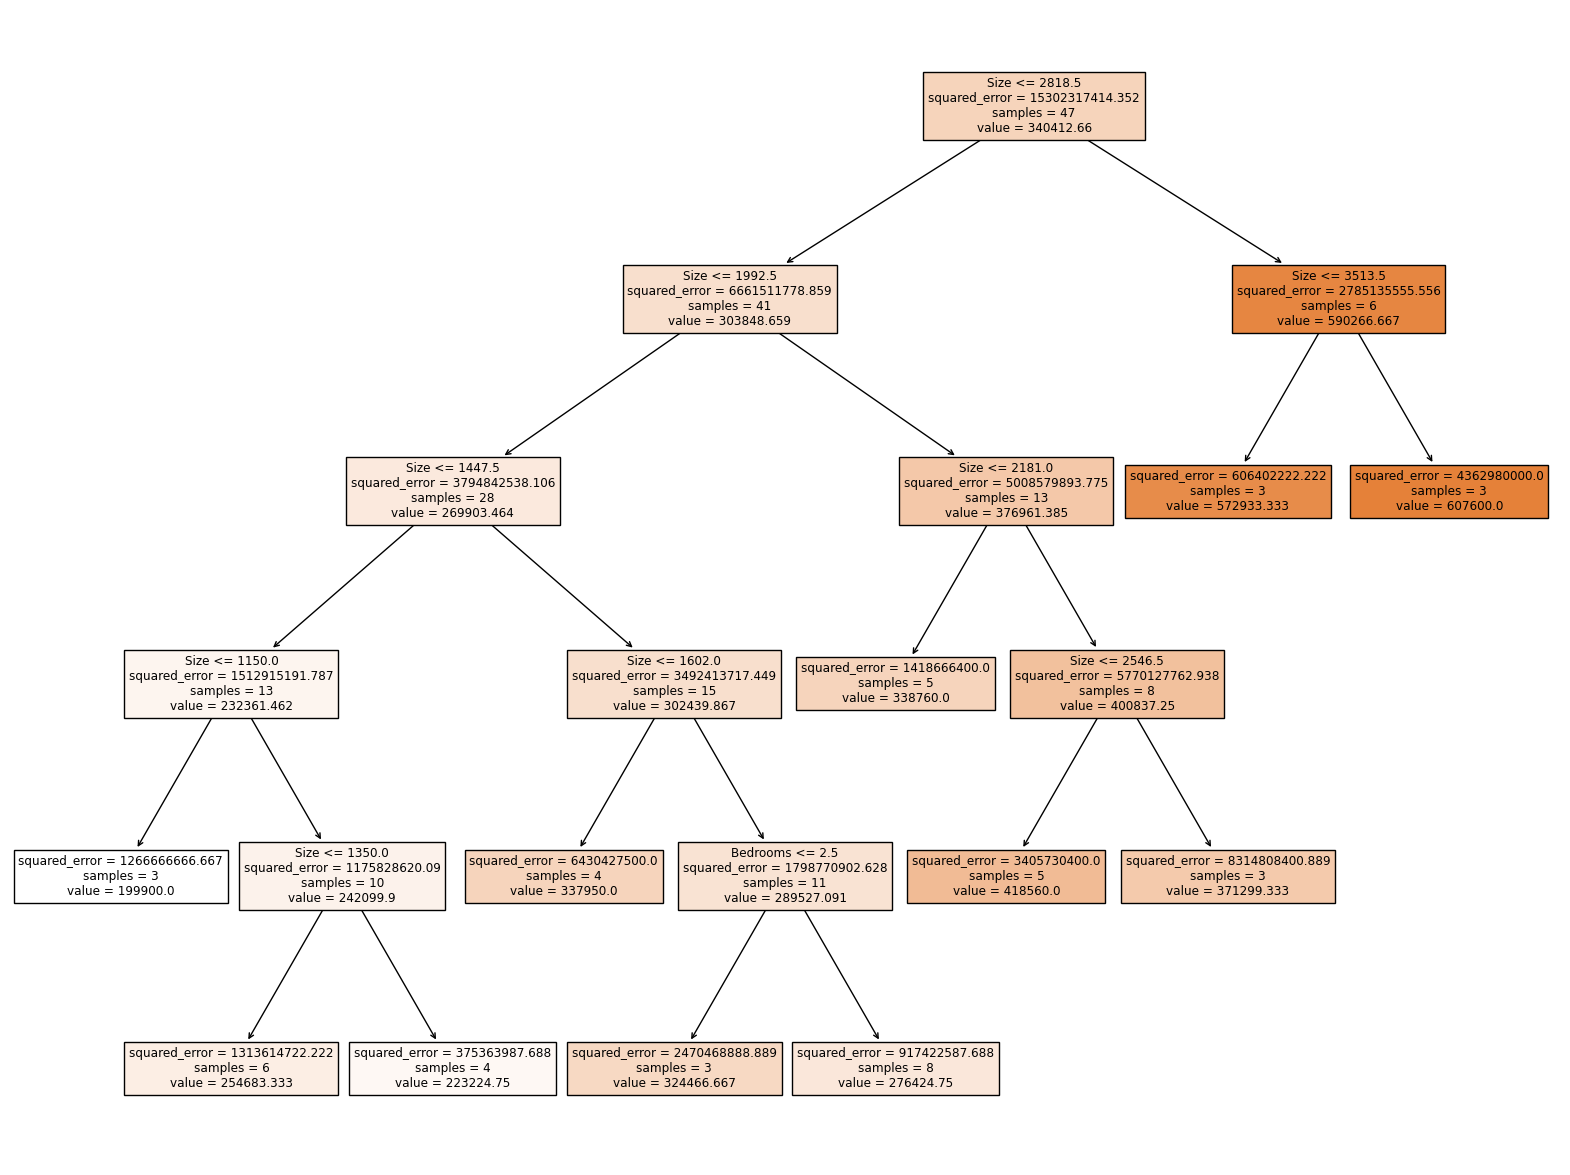

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(20,15))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [ ]:
#value = 232361 - Size<=1447.5
#value = 338760 - 1992.5 <=Size <= 2181
#value = 400837 - 2181 <=Size <= 2818.5
#value = 572933 - 2818.5 <=Size <= 3513.5
#value = 607600 - Size>= 3513.5

In [ ]:
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance

,0,1
0,Size,1.269240e+10
1,Bedrooms,1.071424e+08


Zadanie drzewo decyzyjne

In [ ]:
#wracamy do zbioru danych o wypożyczeniach rowerów
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df=pd.read_csv(url)
df.head()
#zmienne niezależne - atemp, hum, windspeed
#zmienna zależna - cnt
X = df[["atemp", "hum", "windspeed"]]
y = df["cnt"]

In [ ]:
#wytrenowanie modelu
#model ma przewidywać liczbę wypożyczonych rowerów
#dodaj warunek, gdzie min_samples_split - 10% wielkości orygnialnego datasetu
#dodatkowo ogranicz głębokość drzewa max do 5 poziomów
min_num=int(0.1*df.shape[0])
model = DecisionTreeRegressor(
        max_depth=5,
        min_samples_split=min_num
        )
model.fit(X,y)

DecisionTreeRegressor(max_depth=5, min_samples_split=73)

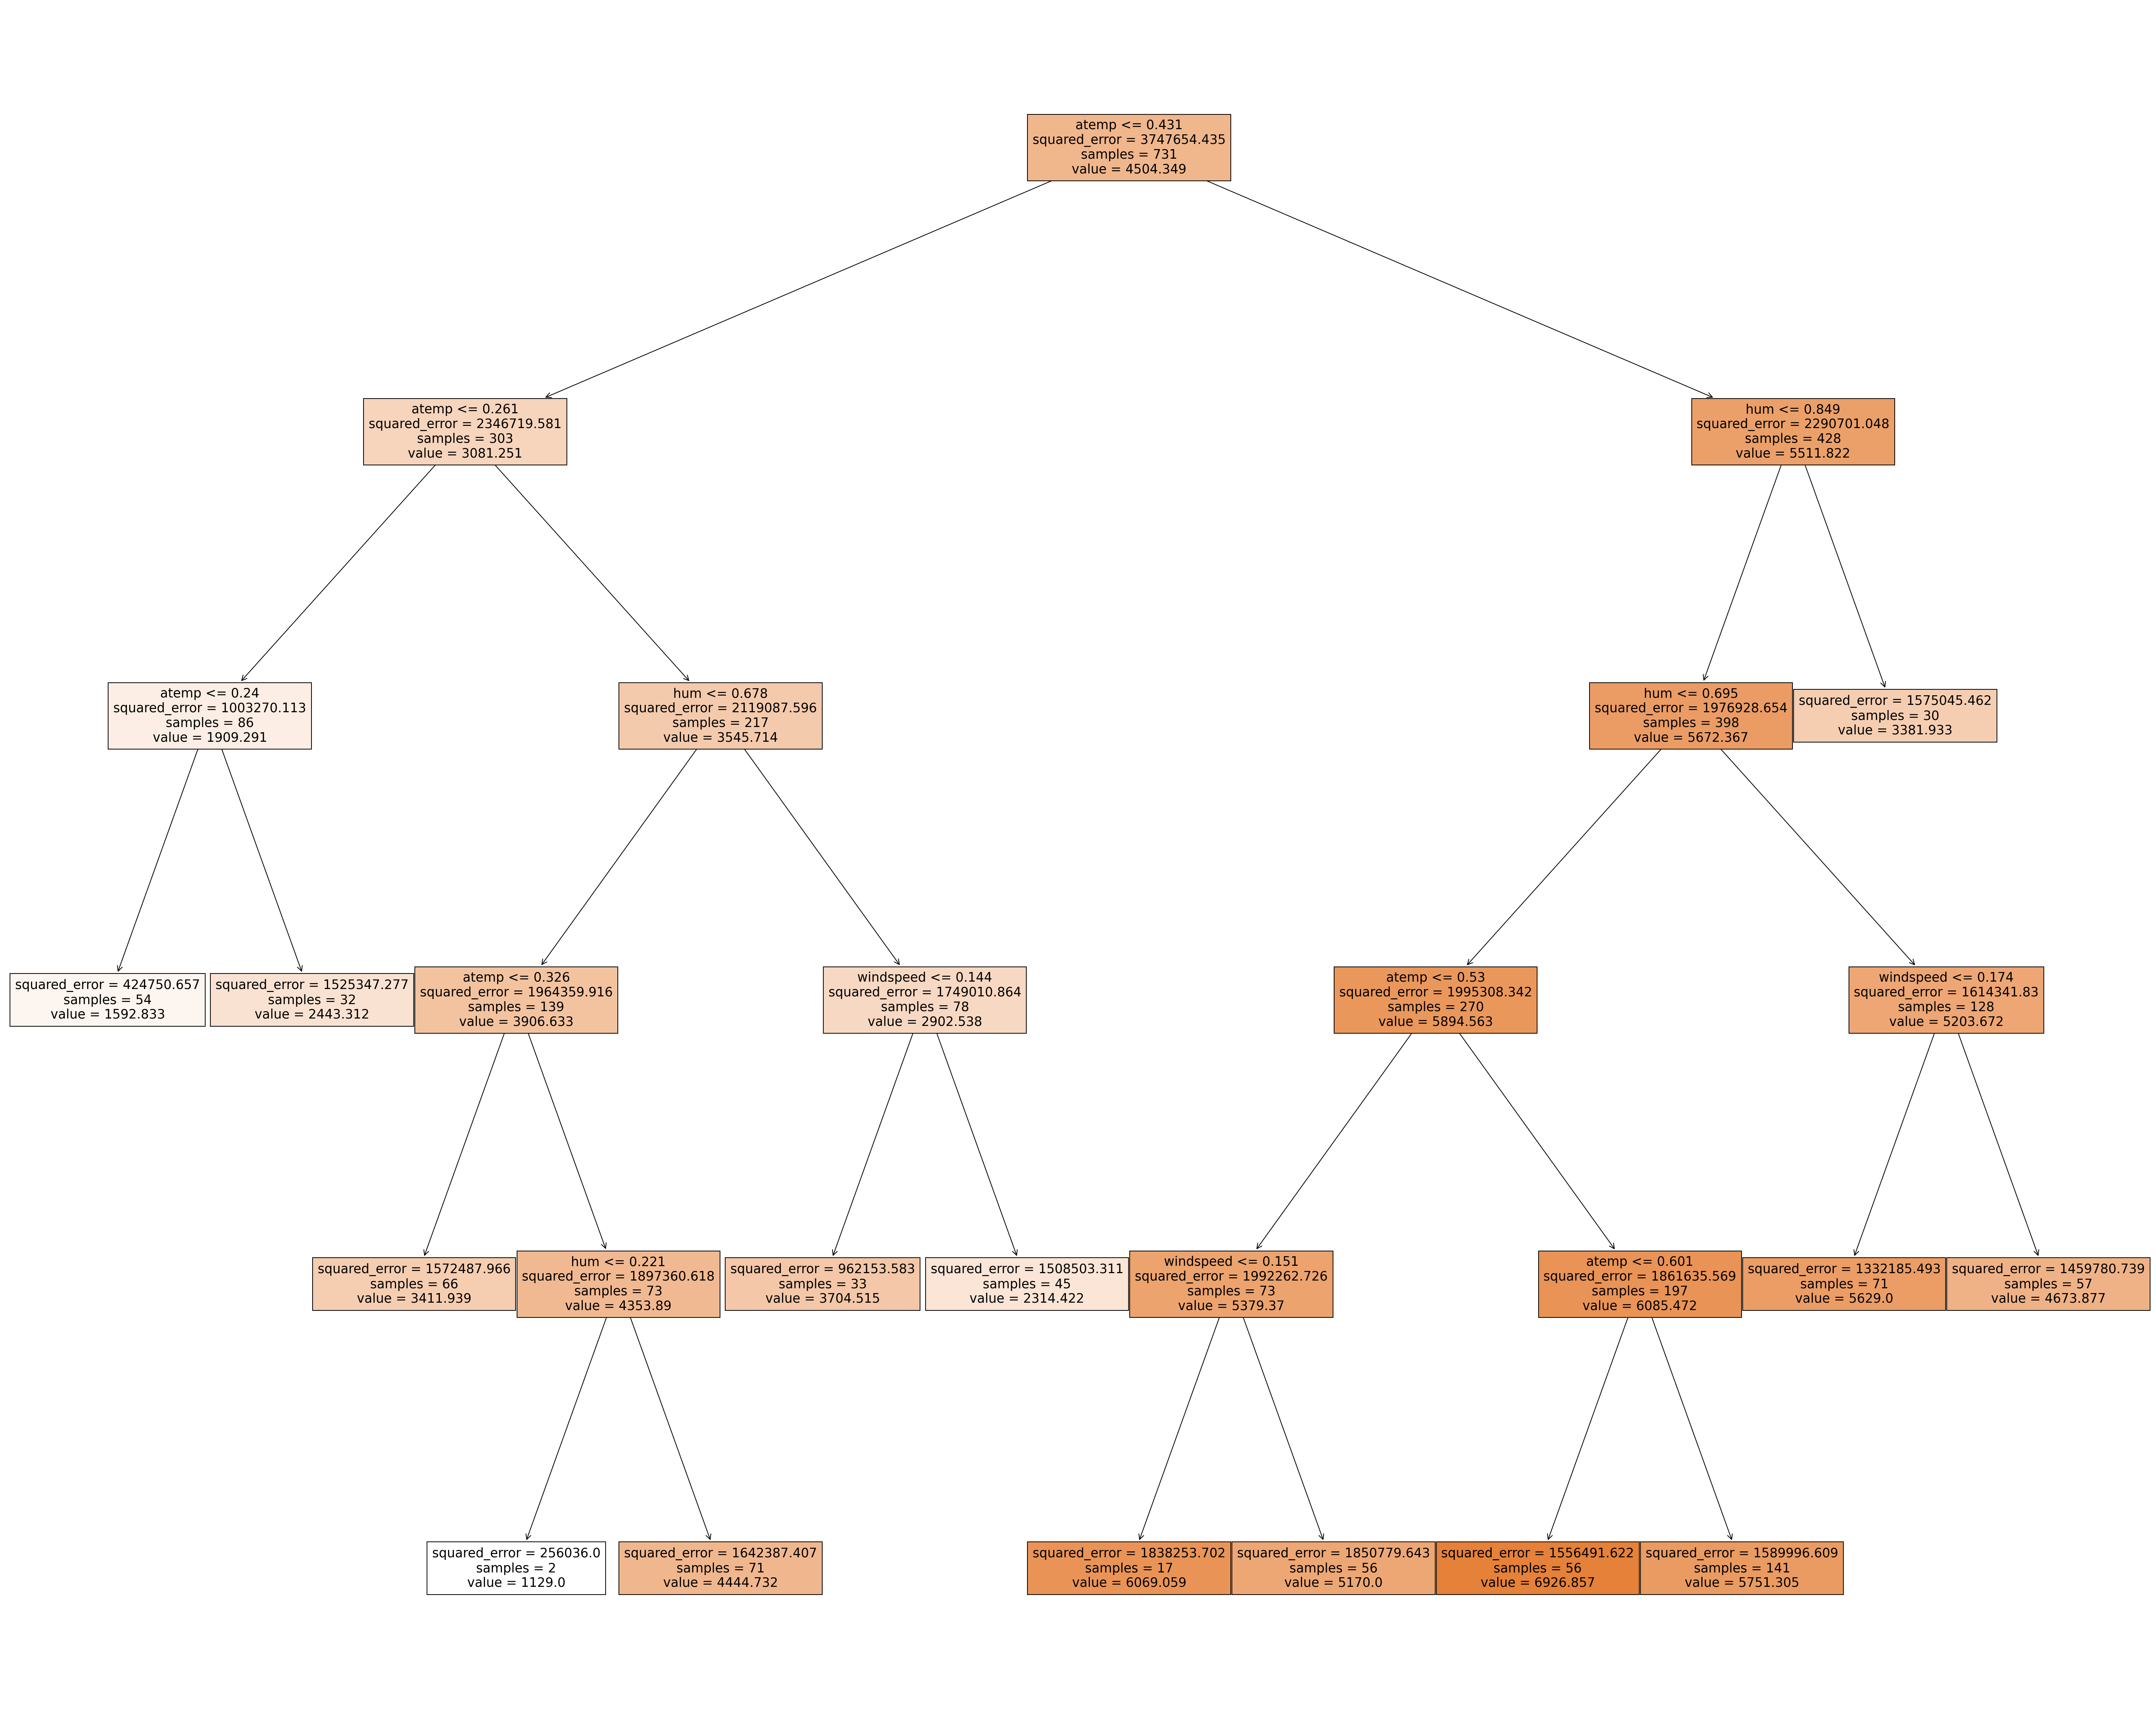

In [ ]:
#zwizualizuj drzewo
fig=plt.figure(figsize=(50,40),dpi=150)
tree_plot=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [ ]:
#odczytaj predykcję dla wartości atemp=0.3, hum=0.3, windspeed=0.3

In [ ]:
#dokonaj predykcji dla tych wartości
model.predict([[0.3,0.3,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([3411.93939394])

In [ ]:
#sprawdź które cechy są najważniejsze w predykcji (feature importance)

feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance

,0,1
0,atemp,1.833413e+06
1,hum,3.550733e+05
2,windspeed,1.042044e+05


ZADANIA

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np

from IPython.display import Math, clear_output

In [ ]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Liczba pożarów")
    plt.ylabel("Liczba włamań")

Plik `fires_thefts.csv` zawiera rzeczywiste dane zebrane przez _U.S. Commission on Civil Rights_, przedstawiające liczbę pożarów w danej dzielnicy na tysiąc gospodarstw domowych (pierwsza kolumna) oraz liczbę włamań w tej samej dzielnicy na tysiąc mieszkańców (druga kolumna). Celem jest stworzenie modelu przewidującego liczbę włamań na podstawie liczby pożarów.

### Zadanie 2

Wczytaj dane z pliku, a następnie stwórz zmienne X i y oraz przypisz im odpowiednie wartości.

In [ ]:
# df=pd.read_csv('/content/fires_thefts (1).csv')
# X=df[['fires']].values
# y=df['thefts'].values
# print(X[:5])
# print(y[:5])

### Zadanie 3

Dokończ implementację funkcji J, która jest funkcją kosztu i realizuję metodę najmniejszych kwadratów. dla przypomnienia, jej wzór wygląda następująco:

$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{2m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

gdzie $m$ - liczba przykładów w zestawie danych

In [ ]:
#h - linear_function
def J(h, theta, X, y):
    # h to funkcja
    # theta to lista współczynników: [theta_0, theta_1]
    # X i y to zmienne przechowujące dane
    # wywołanie tej funkcji w sposób J(linear_function, [1, 2], X, y) powinno zwrócić wartość 228.41857142857137
    m=y.size
    return 1/(2*m)*sum((h(theta,X[i][0])-y[i])**2 for i in range(m))

In [ ]:
J(linear_function,[1,2],X,y)

KeyError: ignored

In [ ]:
J(linear_function,[0.1,0.1],X,y)

### Zadanie 4

Dobierz ręcznie, przy pomocy poniższych widgetów (nie zmieniając kodu) parametry theta w taki sposób, by wartość funkcji kosztu była możliwie jak najmniejsza

In [ ]:
slider_theta_0 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta0', layout={'width': "auto"})
slider_theta_1 = widgets.FloatSlider(min=-20, max=20, step=0.1, value=0, description=r'theta1', layout={'width': "auto"})
out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()
        display(Math(rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"))
        
        
with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

### Zadanie 5

Wytrenuj na tych danych model regresji liniowej

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

In [ ]:
model.intercept_

In [ ]:
model.coef_

### Zadanie 6

Korzystając z zaimplementowanych wyżej funkcji oraz współczynników wytrenowanego modelu nanieś na wykres prostę regresyjną i oblicz wartość funkcji kosztu dla tych współczynników. Spójrz, jak daleko byłeś od idealnego rozwiązania dobierając parametry ręcznie.

In [ ]:
theta=np.concatenate([[model.intercept_],model.coef_])
theta
plot_points(X,y)
plot_function(theta,X,'r')
plt.show()
display(Math(rf"\Large \theta={theta.tolist()}"))

In [ ]:
#1.31 - wraz ze wzrostem liczby pożarów na 1000 mieszkańców o 1 liczba kradzieży na 1000 mieszkańców wzrośnie o 1.31

In [ ]:
J(linear_function,theta,X,y)

### Zadanie 7

Wykorzystując uzyskany model regresyjny przepowiedz liczbę włamań na tysiąc mieszkańców dla dzielnic, w których występują średnio kolejno: 10, 20 i 50 pożarów na tysiąc gospodarstw domowych.

In [ ]:
predict_data=np.array([[10], [20], [50]])
model.predict(predict_data)

###Zadanie 8

Wytrenuj model regresyjny drzewa decyzyjnego i dokonaj predykcji dla tych samych wartości pożarów na tysiąc gospodarstw domowych co wyżej. Porównaj otrzymane wyniki.

Stwórz drugi model drzewa decyzyjnego, w którym ograniczysz maksymalną głębokość i minimalną liczbę obserwacji w liściu.

Następnie zwizualizuj to drzewo.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X = df[["fires"]]
y = df["thefts"]
predict_data=np.array([[10], [20], [50]])
model=DecisionTreeRegressor()
model.fit(X,y)
model.predict(predict_data)

In [ ]:
model=DecisionTreeRegressor(max_depth=5, min_samples_leaf=5)
model.fit(X.values,y)
model.predict(predict_data)

In [ ]:
from sklearn import tree
fig=plt.figure(figsize=(50,40),dpi=150)
tree_plot=tree.plot_tree(model,feature_names=X.columns,filled=True)

Zbiór treningowy i testowy

In [ ]:
url='https://raw.githubusercontent.com/girishkuniyal/Predict-housing-prices-in-Portland/master/ex1data2.txt'
df=pd.read_csv(url,header=None)

In [ ]:
df.columns=['Size','Bedrooms','Price']
df.head()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X.shape,y.shape)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
print(X_test.shape,y_test.shape)

Zbiór walidacyjny

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

In [ ]:
X

In [ ]:
y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)

In [ ]:
print(X.shape,y.shape)

In [ ]:
print(X_train.shape,y_train.shape)

In [ ]:
print(X_val.shape,y_val.shape)

In [ ]:
print(X_test.shape,y_test.shape)

Kroswalidacja

k-krotna walidacja

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold

In [ ]:
df.head()

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [ ]:
cv=KFold(n_splits=5,shuffle=True,random_state=42)
for train,test in cv.split(X,y):
  X_train,y_train=X.iloc[train],y.iloc[train]
  X_test,y_test=X.iloc[test],y.iloc[test]
  print(X_train.shape,X_test.shape)

walidacja leave one out

In [ ]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
cv=LeaveOneOut()
for train,test in cv.split(X,y):
  X_train,y_train=X.iloc[train],y.iloc[train]
  X_test,y_test=X.iloc[test],y.iloc[test]
  print(X_train.shape,X_test.shape)

OCENA JAKOŚCI MODELU

Współczynnik dopasowania R^2

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df.head()

In [ ]:
X=df[['Size']]
y=df['Price']
model=LinearRegression()
model.fit(X,y)

In [ ]:
y_predict=model.predict(X)

In [ ]:
r2_score(y,y_predict)

In [ ]:
Adj_r2 = 1 - (1-r2_score(y,y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)
Adj_r2

rozszerzony model

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

model=LinearRegression()
model.fit(X,y)

In [ ]:
y_predict=model.predict(X)

In [ ]:
r2_score(y,y_predict)

In [ ]:
Adj_r2 = 1 - (1-r2_score(y,y_predict)) * (len(y)-1)/(len(y)-X.shape[1]-1)

In [ ]:
Adj_r2

MAE

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df.head()

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_predict)

rozszerzony model

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,y_predict)

MAPE

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X=df[['Size']]
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_predict)

rozszerzony model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_absolute_percentage_error(y_test,y_predict)

MSE

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df.head()

In [ ]:
X=df[['Size']]
y=df['Price']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_predict)

rozszerzony model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df.head()

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_predict)

RMSE

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df.head()

In [ ]:
X=df[['Size']]
y=df['Price']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_predict,squared=False)

rozszerzony model

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
df.head()

In [ ]:
X=df[['Size','Bedrooms']]
y=df['Price']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_predict,squared=False)

Wykres zbiór treningowy vs walidacyjny

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Wczytajmy dane
url='https://raw.githubusercontent.com/PacktPublishing/Python-Machine-Learning-Cookbook/master/Chapter01/bike_day.csv'
df = pd.read_csv(url)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
y=df[['cnt']]
X=df[['atemp','hum','windspeed']]

In [ ]:
y.shape

(731, 1)

In [ ]:
X.shape

(731, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1)


In [ ]:
X_train.shape

(438, 3)

In [ ]:
X_test.shape

(147, 3)

In [ ]:
X_val.shape

(146, 3)

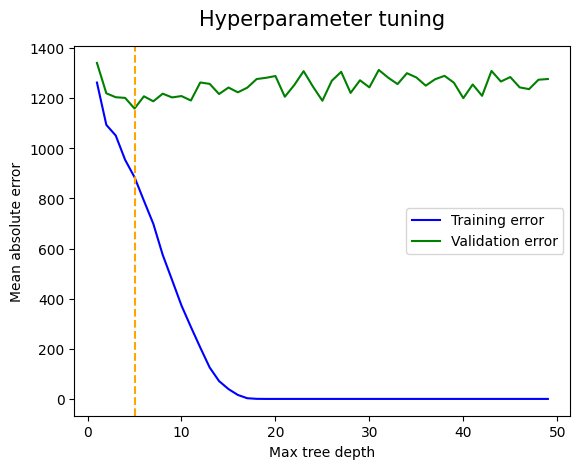

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

max_depths=range(1,50)
training_error=[]
validation_error=[]
for max_depth in max_depths:
  model_1=tree.DecisionTreeRegressor(max_depth=max_depth)
  model_1.fit(X_train,y_train)

  pred_1=model_1.predict(X_train)
  training_error.append(mean_absolute_error(y_train,pred_1))

  pred_2=model_1.predict(X_val)
  validation_error.append(mean_absolute_error(y_val,pred_2))

plt.plot(max_depths,training_error,color='blue',label='Training error')
plt.plot(max_depths,validation_error,color='green',label='Validation error')
plt.xlabel('Max tree depth')
plt.axvline(x=np.argmin(validation_error)+1,color='orange',linestyle='--')

plt.ylabel('Mean absolute error')
plt.title('Hyperparameter tuning',pad=15,size=15)
plt.legend()                                     
                                     

In [ ]:
np.argmin(validation_error)+1

5

Kroswalidacja w praktyce

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

Metoda 1

In [ ]:
kf=KFold(n_splits=10,random_state=8,shuffle=True)
model=tree.DecisionTreeRegressor(random_state=8,max_depth=2)
score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')

print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

Cross Validation Score are [1187.18138527 1023.72989833 1138.59737162 1297.80030458 1239.9914492
 1066.42548067 1058.21113291 1050.7323255  1206.55762563 1306.24518702]
Cross Validation Average Score is 1157.547216072077


In [ ]:
kf=KFold(n_splits=10,random_state=8,shuffle=True)
model=tree.DecisionTreeRegressor(random_state=8,max_depth=3)
score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')

print('Cross Validation Score are {}'.format(-score))
print('Cross Validation Average Score is {}'.format(-score.mean()))

Cross Validation Score are [1211.229973   1078.6495912  1140.53547289 1306.70045803 1253.52395166
 1020.96789432 1065.63380347 1107.92667072 1235.64781943 1321.11330313]
Cross Validation Average Score is 1174.192893784281


optymalizacja hiperparametrów na zbiorze walidacyjnym

In [ ]:
res=[]
for max_depth in range(1,10):
  kf=KFold(n_splits=10,random_state=8,shuffle=True)
  model=DecisionTreeRegressor(max_depth=max_depth)
  score=cross_val_score(model,X_train,y_train,cv=kf,scoring='neg_mean_absolute_error')
  res.append(-score.mean())

In [ ]:
pd.concat([pd.Series(range(1,10)),pd.Series(res)],axis=1)

,0,1
0,1,1287.746052
1,2,1157.547216
2,3,1174.192894
3,4,1155.245417
4,5,1142.393236
5,6,1171.917603
6,7,1166.576445
7,8,1218.162252
8,9,1261.891979


In [ ]:
np.argmin(res)+1

5

trening modelu z zoptymalizowanymi hiperparametrami na zbiorze treningowym

In [ ]:
model=tree.DecisionTreeRegressor(random_state=8,max_depth=np.argmin(res)+1)
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=8)

ocena skuteczności modelu na zbiorze testowym

In [ ]:
y_pred=model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1242.888727604157

Metoda 2 (krótsza)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=DecisionTreeRegressor()

In [ ]:
gs=GridSearchCV(model,
                param_grid={'max_depth':range(1,10),
                            'min_samples_split':range(10,60,10)},
                cv=10,
                scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)

{'max_depth': 9, 'min_samples_split': 50}


In [ ]:
print(-gs.best_score_)

1106.1847521799743


In [ ]:
y_pred=gs.predict(X_test)
mean_absolute_error(y_test,y_pred)

1250.3780601615883

Kroswalidacja Leave-One-Out (LOOCV)

In [ ]:
from sklearn.model_selection import LeaveOneOut

In [ ]:
model=DecisionTreeRegressor()
res_GSLOO=GridSearchCV(model,
                       param_grid={'max_depth':range(1,10),
                                   'min_samples_split':range(10,60,10)},
                       cv=LeaveOneOut(),
                       scoring='neg_mean_absolute_error')
res_GSLOO.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 60, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(res_GSLOO.best_params_)

{'max_depth': 8, 'min_samples_split': 50}


In [ ]:
print(-res_GSLOO.best_score_)

1113.3364328971675


In [ ]:
res_GSLOO.best_params_

{'max_depth': 8, 'min_samples_split': 50}

In [ ]:
loo_model=tree.DecisionTreeRegressor(max_depth=res_GSLOO.best_params_['max_depth'],
                                     min_samples_split=res_GSLOO.best_params_['min_samples_split'])
loo_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_split=50)

In [ ]:
y_pred=loo_model.predict(X_test)
mean_absolute_error(y_test,y_pred)

1240.8340089482222

ZADANIA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
from google.colab import files

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn import tree


In [ ]:
df=pd.read_csv('/content/car.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df=df.drop('name',axis=1)
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#dummy variables
df_cat=df[['fuel','seller_type','transmission','owner']]
df_cat=pd.get_dummies(data=df_cat,drop_first=True)
df=df[['year','selling_price','km_driven']].join(df_cat)
df.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,0,0,0,1,1,0,1,0,0,0,0
1,2007,135000,50000,0,0,0,1,1,0,1,0,0,0,0
2,2012,600000,100000,1,0,0,0,1,0,1,0,0,0,0
3,2017,250000,46000,0,0,0,1,1,0,1,0,0,0,0
4,2014,450000,141000,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
#podzial na zmienną zależną i zmienne niezależne
#y - selling price
y=df['selling_price']
X=df.drop('selling_price',axis=1)

In [ ]:
#zbuduj 2 modele
#drzewo decyzyjne
#regresja liniowa

from sklearn.linear_model import LinearRegression
from sklearn import tree

#regresja
reg_model=LinearRegression()
reg_model.fit(X,y)
reg_pred=reg_model.predict(X)

#drzewo decyzyjne
tree_model=tree.DecisionTreeRegressor(random_state=111,min_samples_split=400)
tree_model.fit(X,y)
tree_pred=tree_model.predict(X)

In [ ]:
#sprawdz skutecznosc modeli na podstawie nastepujacych metryk
#R2
#MAE
#RMSE

print('Linear Regression R2 score: '+str(round(r2_score(y,reg_pred),2)))
print('Decision Tree R2 score: '+str(round(r2_score(y,tree_pred),2)))

Linear Regression R2 score: 0.46
Decision Tree R2 score: 0.5


In [ ]:
#MAE
print('Linear Regression MAE score: '+str(round(mae(y,reg_pred),2)))
print('Decision Tree MAE score: '+str(round(mae(y,tree_pred),2)))

Linear Regression MAE score: 229254.77
Decision Tree MAE score: 198304.84


In [ ]:
#RMSE
print('Linear Regression RMSE score: '+str(round(mse(y,reg_pred,squared=False),2)))
print('Decision Tree RMSE score: '+str(round(mse(y,tree_pred,squared=False),2)))

Linear Regression RMSE score: 425388.24
Decision Tree RMSE score: 410557.26


In [ ]:
#sprawdz skuteczność modeli dla samochodów napedzanych benzyną

y_petrol=df[df['fuel_Petrol']==1]['selling_price']
X_petrol=df[df['fuel_Petrol']==1].drop('selling_price',axis=1)

reg_pred_petrol = reg_model.predict(X_petrol)
tree_pred_petrol = tree_model.predict(X_petrol)

print('Linear Regression R2 score: '+ str(round(r2_score(y_petrol, reg_pred_petrol),2)))
print('Decision Tree R2 score: '+ str(round(r2_score(y_petrol, tree_pred_petrol),2)))
print('')
print('Linear Regression MAE score: '+ str(round(mae(y_petrol, reg_pred_petrol),2)))
print('Decision Tree MAE score: '+ str(round(mae(y_petrol, tree_pred_petrol),2)))
print('')
print('Linear Regression RMSE score: '+ str(round(mse(y_petrol, reg_pred_petrol, squared=False),2)))
print('Decision Tree RMSE score: '+ str(round(mse(y_petrol, tree_pred_petrol, squared=False),2)))

Linear Regression R2 score: 0.11
Decision Tree R2 score: 0.3

Linear Regression MAE score: 188267.63
Decision Tree MAE score: 134524.7

Linear Regression RMSE score: 343680.95
Decision Tree RMSE score: 303619.18


In [ ]:
#podziel zbiór na treningowy i testowy
from sklearn.model_selection import train_test_split

# Podział na dane treningowe i testowe.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=111)

In [ ]:
#na podstawie zbioru treningowego wybierz hiperparametry dla modelu drzewa decyzyjnego
model=DecisionTreeRegressor()
gs=GridSearchCV(model,
                param_grid={'max_depth':range(1,20),
                            'min_samples_split':range(50,100,10)},
                cv=10,
                scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_split': range(50, 100, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [ ]:
#przetrenuj model z wybranymi hiperparametrami
tree_model=tree.DecisionTreeRegressor(random_state=111,min_samples_split=50,max_depth=7)
tree_model.fit(X_train,y_train)
tree_pred=tree_model.predict(X_test)
mae(y_test,tree_pred)

172579.00489160747

In [ ]:
#sprawdz wyniki na zbiorze testowym